In [3]:
#!pip install tweepy
import re
import nltk
import tweepy
import numpy as np
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [6]:
df = pd.read_csv("E:/Freelance Projects/Coding with Jupeter Notebook for Data Science assignment/9. Text Mining/Elon_musk.csv")

In [7]:
df.head()

,Unnamed: 0,Text
0,1,@kunalb11 I�m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [8]:
df.drop('Unnamed: 0',axis = 1, inplace = True)

In [9]:
df.shape

(1999, 1)

In [12]:
# let's have a look at some tweets
pd.set_option("display.max_colwidth", 1) # allows us to see the full text
df.sample(10)

,Text
157,@DMC_Ryan @lafebra @Gfilche There�s more storage now &amp; easily upgradable
1253,@SavedTesla @peterdog15 Shaped like a diamond &amp; aligned on true north
663,"@ICannot_Enough @Erdayastronaut @rweb11742 Pretty close. Definitely feel <U+0001F4AF> if I take DayQuil. Frankly, this was one� https://t.co/hj0ThLR48N"
1174,@ArtifactsHub That species has stood the test of time
51,@Dogecoinrich <U+0001F923><U+0001F923>
597,"@philwhln @heydave7 Because I am not an investor. Tesla is definitely not the only good company, but investing is n� https://t.co/wDUz0wnuIn"
991,@WR4NYGov At least success is in the set of all possible outcomes this time!
38,@michaelhodapp_ Back to work tonight!
1246,@samiralyateem @ID_AA_Carmack There are a lot of pointless zeroes in FP32 neural nets. You can chop off 16 of the 3� https://t.co/mlPVbpni4y
1748,@EvaFoxU @schristakos @BernieSanders Haha


In [13]:
# we need to remove a lot of junk(urls, tags, RT, Hashtags) from the tweets
# so we will use regular exlpression for that
def clean_tweets(tweets):
  tweets = re.sub('@[A-Za-z0–9]+', '', tweets) #Removing tag(@)
  tweets = re.sub('#', '', tweets) # Removing hashtag(#)
  tweets = re.sub('RT[\s]+', '', tweets) # Removing RT
  tweets = re.sub('https?:\/\/\S+', '', tweets) # Removing links
  return tweets

In [16]:
df.Text = df.Text.apply(clean_tweets)

In [17]:
# let's see if it cleaned everything or not
pd.set_option("display.max_colwidth", -1) # allows us to see the full text
df.sample(10)

<ipython-input-17-ec3dc7179ffa>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1) # allows us to see the full text


,Text
1391,Just learned that my physics prof from Penn is head of Fermilab &amp; still has some of my old homework <U+263A><U+FE0F>
756,Symptoms of a typical cold. Nothing unusual so far.
1201,60 Where is our prediction of probability inaccurate?
1542,Some big milestones coming up
1866,"At some point, we should probably do advertising as art/communication/entertainment &amp; to support high quality media"
1958,305 We have reduced pricing on Model Y LR dual motor &amp; will offer a LR single moto�
861,This build should be noticeably better with interventions
634,That is certainly the intention!
1156,45 True
1807,"Also, we get our lithium from Australia"


In [18]:
# let's calculate subjectivity and Polarity
# function for subjectivity
def calc_subj(tweet):
    return TextBlob(tweet).sentiment.subjectivity
 
# function for Polarity
def calc_pola(tweet):
    return TextBlob(tweet).sentiment.polarity
 
df['Subjectivity'] = df.Text.apply(calc_subj)
df['Polarity'] = df.Text.apply(calc_pola)

In [19]:
# let's have quick look to our dataset
df.head(10)

,Text,Subjectivity,Polarity
0,11 I�m an alien,0.750000,-0.250000
1,_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?,0.000000,0.000000
2,Great interview!,0.750000,1.000000
3,27 Doge is underestimated,0.000000,0.000000
4,Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!,0.366667,0.345313
5,Happy New Year of the Ox!,0.727273,0.485227
6,"Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.",0.400000,0.000000
7,_ 10 Haha thanks :),0.500000,0.300000
8,10 Indeed! Tweets definitely do not represent real-world time allocation.,0.500000,0.000000
9,The most entertaining outcome is the most likely,0.675000,0.375000


In [20]:
# now let's classify these tweets based on their sentiment(polarity)
def sentiment(polarity):
    result = ''
    if polarity > 0:
        result = 'Positive'
    elif polarity == 0:
        result = 'Netural'
    else:
        result = 'Negative'
    return result

In [21]:
df['Sentiment'] = df.Polarity.apply(sentiment)

In [22]:
### Print the data
df.head()

,Text,Subjectivity,Polarity,Sentiment
0,11 I�m an alien,0.750000,-0.250000,Negative
1,_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?,0.000000,0.000000,Netural
2,Great interview!,0.750000,1.000000,Positive
3,27 Doge is underestimated,0.000000,0.000000,Netural
4,Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!,0.366667,0.345313,Positive


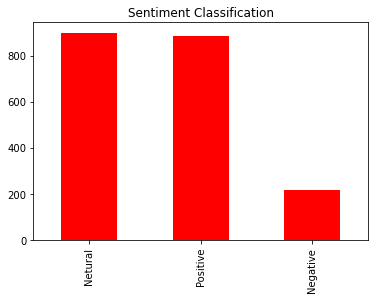

In [23]:
# let's see how many ratio of sentiment
df.Sentiment.value_counts().plot(kind='bar', color='red')
plt.title('Sentiment Classification')
plt.show()

Text(0, 0.5, 'Subjectivity')

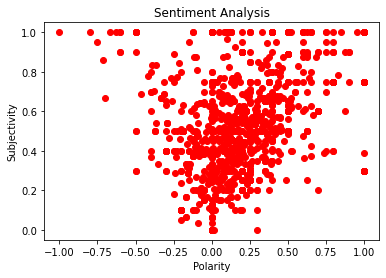

In [24]:
plt.scatter(df.Polarity, df.Subjectivity, color='red')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [25]:
# let's see the percentage of different sentiment's class
 
# Creat
Df_sentiment = pd.DataFrame(df.Sentiment.value_counts(normalize=True)*100)
 
# calculating percentage
Df_sentiment['Total'] = df.Sentiment.value_counts()

In [26]:
Df_sentiment

,Sentiment,Total
Netural,44.972486,899
Positive,44.272136,885
Negative,10.755378,215
